# Session 3: Assignment

Do a 2-D linear regression on Iris.

We are now going to innovate our linear regression from Session 3 by adding another input variable, so that now are input is two dimensions. We'll go back to the Iris dataset, and pose the following problem: given the sepal length and sepal width (first two features), try to predict the petal length (third feature).

Load the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
data, labels = iris.data[:,0:2], iris.data[:,2]

num_samples = len(labels)  # size of our dataset

# shuffle the dataset
shuffle_order = np.random.permutation(num_samples)
data = data[shuffle_order, :]
labels = labels[shuffle_order]


Like the 1-dimensional problem previously, we can still do linear regression, except now we have two variables and therefore two weights as well. Let's denote the input variables as $x_1$ and $x_2$ and instead of using $m$ as the coefficient variable, let's use $w_1$ and $w_2$. So for linear regression, we would have the following function:

$$
f(X) = w_1 x_1 + w_2 x_2 + b 
$$

Rather than having two parameters as in the 1-d example, now there are three parameters: $w1$, $w2$, and $b$.

We can visualize this graphically using a neuron diagram:

![2 input neuron](https://ml4a.github.io/images/figures/neuron2.png)


For example, suppose set $w = [0.2, 0.6]$ and $b = -0.3$. Let's calculate the resulting $y$. We can program this as a function called `weighted_sum`.

In [2]:
def weighted_sum(x, w, b):
    return b + np.dot(w, x)

# set our paramters
w = [0.2, 0.6]
b = -0.3

# for example, let's use the first data point
X, y = data, labels

pred_y = [weighted_sum(x, w, b) for x in X]

# let's print out the first prediction
print("for x=[%0.2f, %0.2f], predicted = %0.2f, actual = %0.2f" % (X[0][0], X[0][1], pred_y[0], y[0]))

for x=[6.50, 3.00], predicted = 2.80, actual = 5.50


Recall that we can evaluate the quality of our predictions using the sum-squared error function.

In [3]:
# sum squared error
def cost(y_pred, y_actual):
    return 0.5 * np.sum((y_actual-y_pred)**2)

error = cost(pred_y, y)
print(error)

313.0096


Given a dataset, we can use this setup to do linear regression, just as we did in the case of the one-dimensional dataset in th previous section. In this case, we are no longer able to visualize the loss surface, because our function has 3 parameters ($w_1$, $w_2$, and $b$) and therefore requires four dimensions to plot the loss surface with repsect to the parameters). But the regression would work just the same way; we can optimize our three parameters using calculus and finding the partial derivative of the cost function with respect to all the parameters.

Since we now have two $w$ and two $x$, we will use the subscript to differentiate them. So $x_1$ is the first element in the input variable $X$. We will use the superscript to denote the $i-th$ point in the dataset. So $(X^1, y^1)$ is the first point in the dataset and $(X^2, y^2)$ is the second. 

We find that our partial derivatives are:

$$ \frac{\partial J}{\partial w_1} = - \sum{x_1^i \cdot (y^i - (w_1 x_1^i + w_2 x_2^i+ b))} $$
$$ \frac{\partial J}{\partial w_2} = - \sum{x_2^i \cdot (y^i - (w_1 x_1^i + w_2 x_2^i+ b))} $$
$$ \frac{\partial J}{\partial b} = - \sum{y^i - (w_1 x_1^i + w_2 x_2^i+ b)} $$

Again, we use the following update rule, where we calculate the gradient and then adjust the parameters $w_1$, $w_2$, and $b$:

$$ w_1 := w_1 - \alpha \cdot \frac{\partial J}{\partial w_i} $$
$$ w_2 := w_2 - \alpha \cdot \frac{\partial J}{\partial w_2} $$
$$ b := b - \alpha \cdot \frac{\partial J}{\partial b} $$

If we implement this in code, as we did in the previous session for the 1-D example:

initial parameters: w1=0.609, w2=0.293, b=0.207
initial cost = 11.035
final parameters: w1=1.942, w2=-0.888, b=-0.275
final cost = 0.656


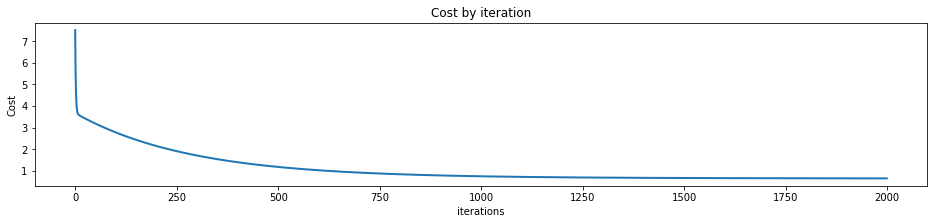

In [12]:
import random

# grab our data
X, y = data, labels

# always a good idea to normalize
X = X / np.amax(X, axis=0)
y = y / np.amax(y, axis=0)

# choose a random initial m, b
w, b = [random.random(), random.random()], random.random()

# our function w1 * x1 + w2 * x2 + b
def F(X, w, b):
    return np.sum(w*X, axis=1) + b

# what is our error?
y_pred = F(X, w, b)
init_cost = cost(y_pred, y)

print("initial parameters: w1=%0.3f, w2=%0.3f, b=%0.3f"%(w[0], w[1], b))
print("initial cost = %0.3f" % init_cost)

# implement partial derivatives of our parameters
def dJdw1(X, y, w, b):
    return -np.dot(X[:,0], y - F(X, w, b))

def dJdw2(X, y, w, b):
    return -np.dot(X[:,1], y - F(X, w, b))

def dJdb(X, y, w, b):
    return -np.sum(y - F(X, w, b))

# choose the alpha parameter and number of iterations
alpha = 0.001
n_iters = 2000

# keep track of error
errors = []
for i in range(n_iters):
    w[0] = w[0] - alpha * dJdw1(X, y, w, b)
    w[1] = w[1] - alpha * dJdw2(X, y, w, b)
    b = b - alpha * dJdb(X, y, w, b)
    y_pred = F(X, w, b)
    j = cost(y_pred, y)
    errors.append(j)
    
# plot it
plt.figure(figsize=(16, 3))
plt.plot(range(n_iters), errors, linewidth=2)
plt.title("Cost by iteration")
plt.ylabel("Cost")
plt.xlabel("iterations")

# what is our final error rate
y_pred = F(X, w, b)
final_cost = cost(y_pred, y)

print("final parameters: w1=%0.3f, w2=%0.3f, b=%0.3f"%(w[0], w[1], b))
print("final cost = %0.3f" % final_cost)

A nice thing to do is to visualize our function. We can plot the prediction surface, $f(X)$ as a function of  $X=\left[x_1,x_2\right]$ within some range. We do that in the next cell:

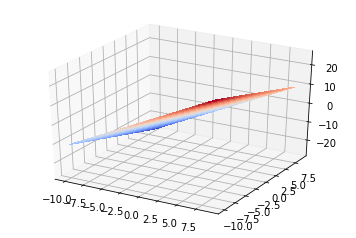

In [76]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
x1, x2 = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))
y = b + w[0]*x1 + w[1]*x2
ax.plot_surface(x1, x2, y, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
